In [1]:
require(data.table)
require(ggplot2)
require(TSrepr)
require(TSdist)
require(dtw)
require(Rcpp)

Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Loading required package: TSrepr

Warning message:
"package 'TSrepr' was built under R version 4.0.5"
Loading required package: TSdist

Warning message:
"package 'TSdist' was built under R version 4.0.5"
Loading required package: proxy

Warning message:
"package 'proxy' was built under R version 4.0.5"

Attaching package: 'proxy'


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtw

Warning message:
"package 'dtw' was built under R version 4.0.5"
Loaded dtw v1.22-3. See ?

In [2]:
# assuming you have the data folder in your working directory in the following format:
# 'working_directory/ClassificationData/dataset_name/'
current_folder=getwd()
dataset='Fish'
main_path=sprintf('%s/ClassificationData/%s/%s',current_folder,dataset,dataset)

dist_path=sprintf('%s/ClassificationData/%s/distances/%s',current_folder,dataset,dataset)

train_data_path=sprintf('%s_TRAIN.txt',main_path)
traindata=as.matrix(fread(train_data_path))
traindata_rep = fread(train_data_path) ## for representations, class data needs to be hold.

test_data_path=sprintf('%s_TEST.txt',main_path)
testdata=as.matrix(fread(test_data_path))
testdata_rep = fread(test_data_path)
#first column is the class variable
trainclass=traindata[,1] # takes -1 and 1
testclass=testdata[,1] # takes -1 and 1

#drop first column
traindata=traindata[,2:ncol(traindata)]
testdata=testdata[,2:ncol(testdata)]

# instance characteristics
tlength=ncol(traindata)
n_series_train=nrow(traindata)
n_series_test=nrow(testdata)

In [3]:
##### K = 1  
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP 
##### K = 3 
## raw + euclidian 
## raw + DTW 
## raw + LCSS 
## raw + ERP 
##### K = 5
## raw + euclidian
## raw + DTW
## raw + LCSS 
## raw + ERP

### Representations

Prepare data as long format for representations 

In [4]:
setnames(traindata_rep,'V1','class')

traindata_rep <- traindata_rep[order(class)]

head(traindata_rep)

traindata_rep[,class:=as.character(class)]
traindata_rep[,id:=1:.N]
long_train=melt(traindata_rep,id.vars=c('id','class'))

long_train[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

long_train

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.977953,1.963187,1.934762,1.897094,1.859885,1.816450,1.773163,1.730122,1.687492,...,1.702214,1.742814,1.783627,1.823930,1.863262,1.903148,1.932075,1.955944,1.973610,1.978364
1,1.887046,1.849757,1.824631,1.799098,1.776872,1.747330,1.719855,1.690626,1.661560,...,1.686838,1.718572,1.745274,1.772193,1.788906,1.801538,1.811330,1.825495,1.848032,1.877445
1,1.881040,1.848479,1.812753,1.790063,1.758131,1.723326,1.691993,1.654464,1.617108,...,1.720804,1.744463,1.767785,1.791751,1.821655,1.842613,1.863252,1.870489,1.870824,1.872736
1,1.814603,1.782895,1.744986,1.705631,1.674927,1.647334,1.695282,1.742102,1.780002,...,1.502711,1.543605,1.588366,1.635307,1.675223,1.716152,1.750666,1.773703,1.792439,1.807926
1,1.947158,1.929248,1.905736,1.867690,1.829844,1.792177,1.754741,1.717404,1.680275,...,1.723207,1.759576,1.790547,1.826602,1.857041,1.879664,1.895502,1.918791,1.941757,1.941268
1,1.657435,1.621217,1.582415,1.544099,1.505872,1.467470,1.429156,1.390732,1.352364,...,1.424993,1.456915,1.479362,1.502800,1.539864,1.577263,1.614477,1.632718,1.643827,1.651013


id,class,time,value
<int>,<chr>,<dbl>,<dbl>
1,1,1,1.9779530
1,1,2,1.9631868
1,1,3,1.9347625
1,1,4,1.8970943
1,1,5,1.8598853
1,1,6,1.8164503
1,1,7,1.7731629
1,1,8,1.7301218
1,1,9,1.6874920


#### Piecewise Aggregate Approximation

##### Segment Length = 5

In [5]:
# Piecewise Aggregate Approximation
segment_length=5

# sort long table just in case
long_train=long_train[order(id,time)]

paa_results <- vector('list',n_series_train)
for (i in 1:n_series_train){

data_ts=long_train[id==i]$value
paa_rep=repr_paa(data_ts, segment_length, meanC)
#plot(paa_rep,type='l')
paa_results[[i]] <- paa_rep 
}
paa_list <- vector('list', n_series_train)
for (i in 1:n_series_train) {
  
    paa_list[[i]] = as.data.table(t(paa_results[[i]]))
  
    }
paa_fit_5 <- rbindlist(paa_list) 
paa_fit_5


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.926576,1.730408,1.5172838,1.3065454,1.0971591,0.8895151,0.6835365,0.47593132,0.2697833,0.06554035,...,0.36422524,0.45706203,0.6206488,0.8353120,1.0463455,1.2547512,1.457674,1.661434,1.861208,1.969306
1.827481,1.690552,1.5466887,1.3984813,1.2462486,1.0916588,0.9348969,0.77610745,0.6143963,0.45541152,...,0.18516017,0.38445045,0.5879577,0.7912763,1.0003167,1.2137657,1.428960,1.642495,1.783848,1.850324
1.818093,1.654018,1.4760333,1.2938484,1.1134766,0.9350419,0.7578982,0.58139665,0.4058705,0.22965527,...,0.45212181,0.63103488,0.8122943,0.9882918,1.1648459,1.3405580,1.515546,1.685274,1.817411,1.871350
1.744608,1.732528,1.7891547,1.6467479,1.4853703,1.3190604,1.1495553,0.98264642,0.8187397,0.65283042,...,0.02005266,0.22058959,0.4241828,0.6286953,0.8377680,1.0478035,1.255119,1.460412,1.673143,1.791356
1.895935,1.718702,1.5392512,1.3627919,1.1862617,1.0121835,0.8421987,0.67435298,0.5095296,0.34585645,...,0.36397564,0.55260977,0.7433699,0.9339346,1.1230454,1.3127376,1.501334,1.686313,1.849871,1.933938
1.582207,1.392349,1.4348422,1.6070953,1.5618184,1.3834939,1.2116271,1.04232362,0.8664567,0.68904796,...,0.11149055,0.29314791,0.4752163,0.6582762,0.8415886,1.0261603,1.212788,1.391976,1.542753,1.642520
1.835137,1.658111,1.4726123,1.2880204,1.1032575,0.9201574,0.7376073,0.55453719,0.3714270,0.18939085,...,0.45312918,0.62222038,0.7990661,0.9756882,1.1497286,1.3260394,1.503074,1.682465,1.840588,1.876892
1.739339,1.551457,1.3344965,1.3616749,1.5506587,1.6675603,1.4812989,1.26041694,1.0407602,0.82240365,...,0.10482659,0.30522005,0.5081556,0.7080946,0.9111553,1.1162821,1.320812,1.517808,1.687234,1.784152
1.894270,1.709420,1.5066384,1.3015596,1.0944027,0.8860451,0.6788658,0.47167322,0.2631710,0.05462102,...,0.51562276,0.73381240,0.9526689,1.1723388,1.3919143,1.6060002,1.808401,1.904141,1.802230,1.914547


#### Fused Lasso

In [6]:
require(genlasso)
lasso_results <- vector("list",n_series_train)

for(i in 1:n_series_train){
  selected_dt <- long_train[id == i]
  selected_dt <- as.matrix(selected_dt[,4], rownames=FALSE)
  flasso <- trendfilter(selected_dt, ord=0)
  cv <- cv.trendfilter(flasso)
     
    #print(paste0(i,'.Time Series' ))
    #print(paste0('minimum crossvalidated error:',cv$lambda.min))
    #print(paste0('1se error:',cv$lambda.min))
  lasso_results[[i]] <- predict.genlasso(flasso, cv$lambda.min)
  
}


Loading required package: genlasso

Warning message:
"package 'genlasso' was built under R version 4.0.5"
Loading required package: Matrix

Loading required package: igraph

Warning message:
"package 'igraph' was built under R version 4.0.5"

Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold

In [7]:
lasso_dt = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
lasso_dt[[i]] =as.data.table(t(lasso_results[[i]]$fit))
}
lasso_fit_dt = rbindlist(lasso_dt)
head(lasso_fit_dt)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.977354,1.963187,1.934762,1.897094,1.859885,1.816450,1.773163,1.730122,1.687492,1.644814,...,1.702214,1.742814,1.783627,1.823930,1.863262,1.903148,1.932075,1.955944,1.973610,1.977765
1.886974,1.849757,1.824631,1.799098,1.776872,1.747330,1.719855,1.690626,1.661560,1.633387,...,1.686838,1.718572,1.745274,1.772193,1.788906,1.801538,1.811330,1.825495,1.848032,1.877373
1.881024,1.848479,1.812753,1.790063,1.758131,1.723326,1.691993,1.654464,1.617108,1.583198,...,1.720804,1.744463,1.767785,1.791751,1.821655,1.842613,1.863252,1.870489,1.870824,1.872720
1.814474,1.782895,1.744986,1.705631,1.674927,1.647592,1.695282,1.742102,1.780002,1.797919,...,1.502711,1.543605,1.588366,1.635307,1.675223,1.716152,1.750666,1.773703,1.792439,1.807797
1.947089,1.929248,1.905736,1.867690,1.829844,1.792177,1.754741,1.717404,1.680275,1.648913,...,1.723207,1.759576,1.790547,1.826602,1.857041,1.879664,1.895502,1.918791,1.941621,1.941336
1.657360,1.621217,1.582415,1.544099,1.505872,1.467470,1.429156,1.390732,1.352364,1.322170,...,1.424993,1.456915,1.479362,1.502800,1.539864,1.577263,1.614477,1.632718,1.643827,1.650939


#### Classification Trees

#### Max Depth 5

In [8]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 5),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_5 = rbindlist(prediction_list)
tree_fit_dt_5

Warning message:
"package 'caret' was built under R version 4.0.5"
Loading required package: lattice



1,2,3,4,5,6,7,8,9,10,...,454,455,456,457,458,459,460,461,462,463
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.599287,1.599287,1.599287,1.599287,1.599287,1.599287,1.599287,1.599287,1.599287,1.599287,...,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639
1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,...,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562
1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,...,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344
1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,...,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635
1.540588,1.540588,1.540588,1.540588,1.540588,1.540588,1.540588,1.540588,1.540588,1.540588,...,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395
1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,...,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323
1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,...,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181
1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,...,1.497786,1.497786,1.497786,1.497786,1.497786,1.497786,1.497786,1.497786,1.497786,1.497786
1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,...,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425


#### Max Depth 7

In [9]:
library(caret)
library(rpart)
predictions= vector('list', n_series_train)
for(j in 1:n_series_train){
   
selected_dt <- long_train[id == j]

ctrl1=trainControl(method='repeatedcv',number=10,repeats=5)
fit_tree=train(value~time, 
                   data= selected_dt,
                   method = "rpart",
                   control = rpart.control(minsplit = 20, minbucket = 10, maxdepth = 7),
                   metric = 'RMSE',
                   trControl = ctrl1,
                   tuneGrid = expand.grid(cp = 0), 
    )
    
predictions[[j]] <- predict(fit_tree,selected_dt)

}
prediction_list = vector('list', n_series_train)
for(i in seq(1:n_series_train)){
prediction_list[[i]] = as.data.table(t(predictions[[i]]))
}

tree_fit_dt_7 = rbindlist(prediction_list)
tree_fit_dt_7

1,2,3,4,5,6,7,8,9,10,...,454,455,456,457,458,459,460,461,462,463
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.807902,1.807902,1.807902,1.807902,1.807902,1.807902,1.807902,1.807902,1.807902,1.807902,...,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639,1.711639
1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,1.730835,...,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562,1.787562
1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,1.736056,...,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344,1.792344
1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,1.742560,...,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635,1.517635
1.771734,1.771734,1.771734,1.771734,1.771734,1.771734,1.771734,1.771734,1.771734,1.771734,...,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395,1.853395
1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,1.466882,...,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323,1.552323
1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,1.746624,...,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181,1.817181
1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,1.645398,...,1.677476,1.677476,1.677476,1.677476,1.677476,1.677476,1.677476,1.677476,1.677476,1.677476
1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,1.623173,...,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425,1.866425


## Distance Calculations

#### Euclidian

In [10]:
large_number=100000

In [11]:
# raw + euclidian
dist_euc=as.matrix(dist(traindata))
diag(dist_euc)=large_number
fwrite(dist_euc,sprintf('%s_euc_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [12]:
# fusedlasso + euclidian
dist_euc_lasso=as.matrix(dist(lasso_fit_dt))
diag(dist_euc_lasso)=large_number
fwrite(dist_euc_lasso,sprintf('%s_euc_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [13]:
# tree( max depth = 5) + euclidian
dist_euc_tree5=as.matrix(dist(tree_fit_dt_5))
diag(dist_euc_tree5)=large_number
fwrite(dist_euc_tree5,sprintf('%s_euc_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [14]:
# tree( max depth = 7) + euclidian
dist_euc_tree7=as.matrix(dist(tree_fit_dt_7))
diag(dist_euc_tree7)=large_number
fwrite(dist_euc_tree7,sprintf('%s_euc_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [15]:
# PAA( segment length = 5) + euclidian
dist_euc_paa=as.matrix(dist(paa_fit_5))
diag(dist_euc_paa)=large_number
fwrite(dist_euc_paa,sprintf('%s_euc_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### Dynamic Time Warping

In [16]:
# DTW
dist_dtw=as.matrix(dtwDist(traindata))
diag(dist_dtw)=large_number
fwrite(dist_dtw,sprintf('%s_dtw_raw_dist.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [17]:
# fusedlasso + DTW
dist_dtw_lasso=as.matrix(dtwDist(lasso_fit_dt))
diag(dist_dtw_lasso)=large_number
fwrite(dist_dtw_lasso,sprintf('%s_dtw_raw_lasso_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [18]:
# tree ( max depth = 5) + DTW
dist_dtw_tree5=as.matrix(dtwDist(tree_fit_dt_5))
diag(dist_dtw_tree5)=large_number
fwrite(dist_dtw_tree5,sprintf('%s_dtw_raw_tree_depth_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [19]:
# tree ( max depth = 7) + DTW
dist_dtw_tree7=as.matrix(dtwDist(tree_fit_dt_7))
diag(dist_dtw_tree7)=large_number
fwrite(dist_dtw_tree7,sprintf('%s_dtw_raw_tree_depth_7_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [20]:
# PAA( segment length = 5) + DTW
dist_dtw_paa=as.matrix(dtwDist(paa_fit_5))
diag(dist_dtw_paa)=large_number
fwrite(dist_dtw_paa,sprintf('%s_dtw_raw_paa_segment_5_dist.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### LCSS

In [21]:
# LCSS
dist_lcss=TSDatabaseDistances(traindata,distance='lcss',epsilon=0.05)
dist_lcss=as.matrix(dist_lcss)
diag(dist_lcss)=large_number
fwrite(dist_lcss,sprintf('%s_lcss_raw_epsilon_005.csv',dist_path),col.names=F)


x being coerced from class: matrix to data.table



In [22]:
# fusedlasso + LCSS
dist_lcss_lasso=TSDatabaseDistances(lasso_fit_dt,distance='lcss',epsilon=0.05)
dist_lcss_lasso=as.matrix(dist_lcss_lasso)
diag(dist_lcss_lasso)=large_number
fwrite(dist_lcss_lasso,sprintf('%s_lcss_raw_lasso_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [23]:
# tree ( max depth = 5) + LCSS
dist_lcss_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='lcss',epsilon=0.05)
dist_lcss_tree5=as.matrix(dist_lcss_tree5)
diag(dist_lcss_tree5)=large_number
fwrite(dist_lcss_tree5,sprintf('%s_lcss_raw_tree_depth_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [24]:
# tree ( max depth = 7) + LCSS
dist_lcss_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='lcss',epsilon=0.05)
dist_lcss_tree7=as.matrix(dist_lcss_tree7)
diag(dist_lcss_tree7)=large_number
fwrite(dist_lcss_tree7,sprintf('%s_lcss_raw_tree_depth_7_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



In [25]:
# PAA( segment length = 5) + LCSS
dist_lcss_paa=TSDatabaseDistances(paa_fit_5,distance='lcss',epsilon=0.05)
dist_lcss_paa=as.matrix(dist_lcss_paa)
diag(dist_lcss_paa)=large_number
fwrite(dist_lcss_paa,sprintf('%s_lcss_raw_paa_segment_5_epsilon_005.csv',dist_path),col.names=F)

x being coerced from class: matrix to data.table



#### ERP

In [26]:
# ERP 
dist_erp=TSDatabaseDistances(traindata,distance='erp',g=0.5)
dist_erp=as.matrix(dist_erp)
diag(dist_erp)=large_number
fwrite(dist_erp,sprintf('%s_erp_raw_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [27]:
# Fusedlasso + ERP 
dist_erp_lasso=TSDatabaseDistances(lasso_fit_dt,distance='erp',g=0.5)
dist_erp_lasso=as.matrix(dist_erp_lasso)
diag(dist_erp_lasso)=large_number
fwrite(dist_erp_lasso,sprintf('%s_erp_raw_lasso_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [28]:
# tree ( max depth = 5) + ERP 
dist_erp_tree5=TSDatabaseDistances(tree_fit_dt_5,distance='erp',g=0.5)
dist_erp_tree5=as.matrix(dist_erp_tree5)
diag(dist_erp_tree5)=large_number
fwrite(dist_erp_tree5,sprintf('%s_erp_raw_tree_dist_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [29]:
# tree ( max depth = 7) + ERP 
dist_erp_tree7=TSDatabaseDistances(tree_fit_dt_7,distance='erp',g=0.5)
dist_erp_tree7=as.matrix(dist_erp_tree7)
diag(dist_erp_tree7)=large_number
fwrite(dist_erp_tree7,sprintf('%s_erp_raw_tree_dist_7_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [30]:
# PAA( segment length = 5) + ERP 
dist_erp_paa=TSDatabaseDistances(paa_fit_5,distance='erp',g=0.5)
dist_erp_paa=as.matrix(dist_erp_paa)
diag(dist_erp_paa)=large_number
fwrite(dist_erp_paa,sprintf('%s_erp_raw_paa_segment_5_gap_005.csv',dist_path),col.names=F)  

x being coerced from class: matrix to data.table



In [3]:
nn_classify_cv=function(dist_matrix,train_class,test_indices,k=1){
    
    test_distances_to_train=dist_matrix[test_indices,]
    test_distances_to_train=test_distances_to_train[,-test_indices]
    train_class=train_class[-test_indices]
    #print(str(test_distances_to_train))
    ordered_indices=apply(test_distances_to_train,1,order)
    if(k==1){
        nearest_class=as.numeric(trainclass[as.numeric(ordered_indices[1,])])
        nearest_class=data.table(id=test_indices,nearest_class)
    } else {
        nearest_class=apply(ordered_indices[1:k,],2,function(x) {trainclass[x]})
        nearest_class=data.table(id=test_indices,t(nearest_class))
    }
    
    long_nn_class=melt(nearest_class,'id')

    class_counts=long_nn_class[,.N,list(id,value)]
    class_counts[,predicted_prob:=N/k]
    wide_class_prob_predictions=dcast(class_counts,id~value,value.var='predicted_prob')
    wide_class_prob_predictions[is.na(wide_class_prob_predictions)]=0
    class_predictions=class_counts[,list(predicted=value[which.max(N)]),by=list(id)]
    
    
    return(list(prediction=class_predictions,prob_estimates=wide_class_prob_predictions))
    
}

In [4]:
# cv indices start here
require(TunePareto)

set.seed(15011998)
nof_rep=5
n_fold=10
cv_indices=generateCVRuns(trainclass, ntimes =nof_rep, nfold = n_fold, 
                          leaveOneOut = FALSE, stratified = TRUE)

str(cv_indices)

dist_folder=sprintf('%s/ClassificationData/%s/distances/',current_folder,dataset)
dist_files=list.files(dist_folder, full.names=T)

Loading required package: TunePareto

Warning message:
"package 'TunePareto' was built under R version 4.0.5"


List of 5
 $ Run  1:List of 10
  ..$ Fold  1 : int [1:18] 1 120 163 87 10 40 86 15 127 58 ...
  ..$ Fold  2 : int [1:18] 60 5 140 114 24 92 65 128 107 6 ...
  ..$ Fold  3 : int [1:18] 20 136 172 73 61 50 11 3 32 62 ...
  ..$ Fold  4 : int [1:18] 78 111 156 79 4 52 55 119 138 137 ...
  ..$ Fold  5 : int [1:18] 72 54 51 112 67 94 150 80 158 100 ...
  ..$ Fold  6 : int [1:17] 36 59 145 8 95 139 47 167 155 125 ...
  ..$ Fold  7 : int [1:17] 143 64 31 81 28 23 69 38 153 162 ...
  ..$ Fold  8 : int [1:17] 171 151 135 104 27 168 101 169 157 93 ...
  ..$ Fold  9 : int [1:17] 117 9 161 2 99 126 98 82 152 108 ...
  ..$ Fold  10: int [1:17] 142 113 134 109 121 46 84 7 102 71 ...
 $ Run  2:List of 10
  ..$ Fold  1 : int [1:18] 145 64 51 134 28 69 55 139 137 125 ...
  ..$ Fold  2 : int [1:18] 135 117 72 161 79 65 94 47 108 169 ...
  ..$ Fold  3 : int [1:18] 142 151 78 95 114 84 101 92 107 155 ...
  ..$ Fold  4 : int [1:18] 120 31 1 109 112 86 3 46 138 102 ...
  ..$ Fold  5 : int [1:18] 172 60 111 8

In [5]:
list.files(dist_folder)

[1] "Fish_dtw_raw_dist.csv"                      
 [2] "Fish_dtw_raw_lasso_dist.csv"                
 [3] "Fish_dtw_raw_paa_segment_5_dist.csv"        
 [4] "Fish_dtw_raw_tree_depth_5_dist.csv"         
 [5] "Fish_dtw_raw_tree_depth_7_dist.csv"         
 [6] "Fish_erp_raw_gap_005.csv"                   
 [7] "Fish_erp_raw_lasso_gap_005.csv"             
 [8] "Fish_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "Fish_erp_raw_tree_dist_5_gap_005.csv"       
[10] "Fish_erp_raw_tree_dist_7_gap_005.csv"       
[11] "Fish_euc_raw_dist.csv"                      
[12] "Fish_euc_raw_lasso_dist.csv"                
[13] "Fish_euc_raw_paa_segment_5_dist.csv"        
[14] "Fish_euc_raw_tree_depth_5_dist.csv"         
[15] "Fish_euc_raw_tree_depth_7_dist.csv"         
[16] "Fish_lcss_raw_epsilon_005.csv"              
[17] "Fish_lcss_raw_lasso_epsilon_005.csv"        
[18] "Fish_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "Fish_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "Fish_lcss_raw_tree_depth_7_epsilon_005.csv"

In [6]:
dist_files

[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_dist.csv"                      
 [2] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_lasso_dist.csv"                
 [3] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_paa_segment_5_dist.csv"        
 [4] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_tree_depth_5_dist.csv"         
 [5] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_tree_depth_7_dist.csv"         
 [6] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_gap_005.csv"                   
 [7] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_lasso_gap_005.csv"             
 [8] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_paa_segment_5_gap_005.csv"     
 [9] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_tree_dist_5_gap_005.csv"       
[10] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_tree_dist_7_gap_005.csv"       
[11] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_euc_raw_dist.csv"                      
[12] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_euc_raw_lasso_dist.csv"                
[13] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_euc_raw_paa_segment_5_dist.csv"        
[14] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_euc_raw_tree_depth_5_dist.csv"         
[15] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_euc_raw_tree_depth_7_dist.csv"         
[16] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_lcss_raw_epsilon_005.csv"              
[17] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_lcss_raw_lasso_epsilon_005.csv"        
[18] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_lcss_raw_paa_segment_5_epsilon_005.csv"
[19] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_lcss_raw_tree_depth_5_epsilon_005.csv" 
[20] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_lcss_raw_tree_depth_7_epsilon_005.csv"

In [7]:
k_levels=c(1,3,5)
approach_file=list.files(dist_folder)
result=vector('list',length(dist_files)*nof_rep*n_fold*length(k_levels))
iter=1
for(m in 1:length(dist_files)){ #
    print(dist_files[m])
    dist_mat=as.matrix(fread(dist_files[m],header=FALSE))
    for(i in 1:nof_rep){
        this_fold=cv_indices[[i]]
        for(j in 1:n_fold){
            test_indices=this_fold[[j]]
            for(k in 1:length(k_levels)){
                current_k=k_levels[k]
                current_fold=nn_classify_cv(dist_mat,trainclass,test_indices,k=current_k)
                accuracy=sum(trainclass[test_indices]==current_fold$prediction$predicted)/length(test_indices)
                tmp=data.table(approach=approach_file[m],repid=i,foldid=j,
                               k=current_k,acc=accuracy)
                result[[iter]]=tmp
                iter=iter+1
                
            }
            
        }
    
    }   
    
}


[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_lasso_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_paa_segment_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_tree_depth_5_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_dtw_raw_tree_depth_7_dist.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_lasso_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw_paa_segment_5_gap_005.csv"
[1] "C:/Users/brkmb/Desktop/kitaplar/IE48B/HW3/ClassificationData/Fish/distances/Fish_erp_raw

In [12]:
overall_results=rbindlist(result)
overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]



approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Fish_dtw_raw_dist.csv,1,0.2069935,0.09354002,50
Fish_dtw_raw_dist.csv,3,0.2125490,0.09287440,50
Fish_dtw_raw_dist.csv,5,0.2272549,0.11030237,50
Fish_dtw_raw_lasso_dist.csv,1,0.1473203,0.07817485,50
Fish_dtw_raw_lasso_dist.csv,3,0.1552288,0.08357654,50
Fish_dtw_raw_lasso_dist.csv,5,0.1691503,0.10900514,50
Fish_dtw_raw_paa_segment_5_dist.csv,1,0.1522222,0.07956555,50
Fish_dtw_raw_paa_segment_5_dist.csv,3,0.1371895,0.07788058,50
Fish_dtw_raw_paa_segment_5_dist.csv,5,0.1528758,0.08508854,50


In [13]:
overall_results_summary <- overall_results[,list(avg_acc=mean(acc),sdev_acc=sd(acc),result_count=.N),by=list(approach,k)]


overall_results_summary[which.max(overall_results_summary$avg_acc),]

approach,k,avg_acc,sdev_acc,result_count
<chr>,<dbl>,<dbl>,<dbl>,<int>
Fish_erp_raw_gap_005.csv,5,0.2376471,0.1219087,50


In [16]:
result_path <- sprintf('%s/overall_summary/%s',current_folder,dataset)
fwrite(overall_results_summary,sprintf('%s_overall_result_summary.csv',result_path),col.names=T)  

Loading required package: overall_resultsplot2

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'overall_resultsplot2'"


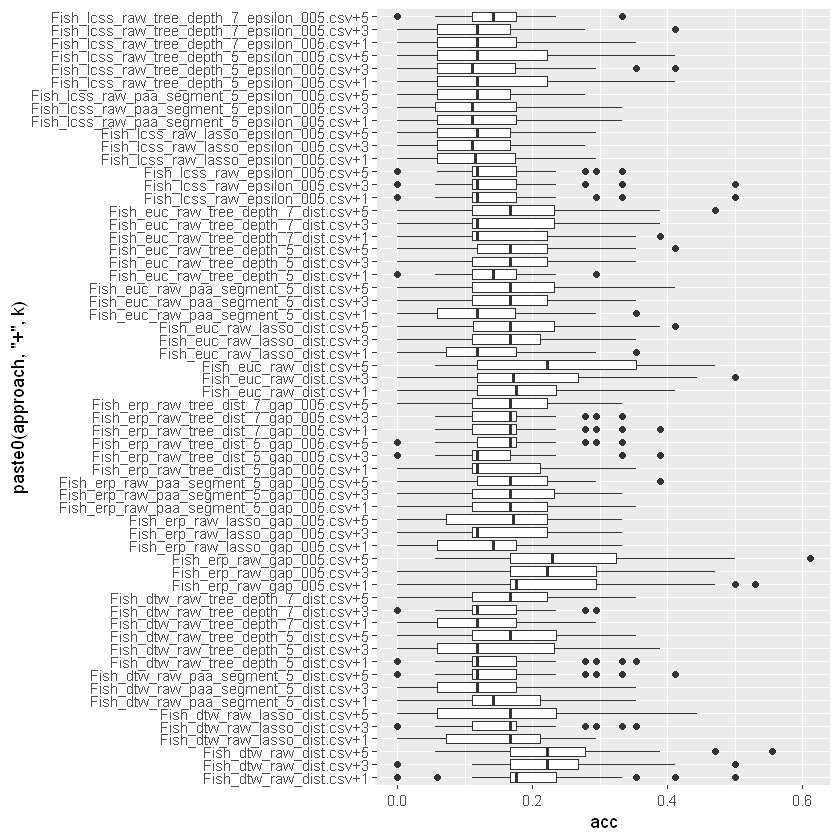

In [15]:
require(overall_resultsplot2)
ggplot(overall_results,aes(x=paste0(approach,'+',k), y=acc)) +
geom_boxplot()+
coord_flip()